## Every Visit Off-Policy Monte Carlo Control with Importance Sampling

In [2]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

from gridworld import GridWorld,plot_value,plot_policy
import numpy as np

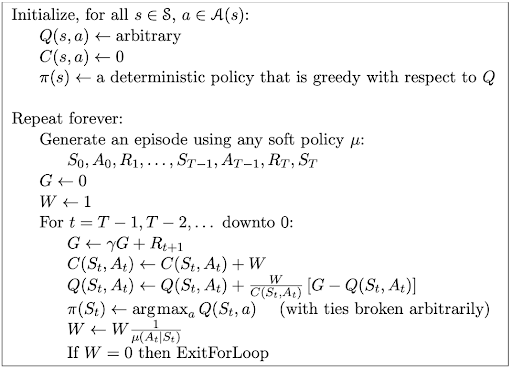

In [3]:
def generate_episode(Mu,size):
    '''
    play an episode on given policy and return G on state-action pairs
    
    Return a dictionary where k is (s,a), value is summation of all rewards after first visit
    '''
    
    env = GridWorld(size)
    done = False
    episode = [] #episode history
    G = 0
    while not done:
        #current_state
        current_state = env.agent_position.copy()
        
        #get action and step
        action_prob = Mu[tuple(current_state)] #
        action = np.random.choice(range(len(action_prob)),p = action_prob)
        next_state, reward, done, info = env.step(action)
        
        episode.append({'St':tuple(current_state), 'At':action,'Rt':reward,'G':G,'St+1':tuple(next_state)})
        G+=reward
    
    return episode

In [41]:
def policy_generator(size):
    r = np.random.rand(4)
    p = np.exp(r)/np.exp(r).sum()
    print(p)
    Mu = {k:p for k in [(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != (size-1)*2]}
    return Mu

def MC_control_off_policy(Pi,size,iter_num, gamma = 0.8):

    '''
    off-policy every-visit MC prediction algorithm
    '''
    Q = {k:0 for k in [((i,j),a) for i in range(size) for j in range(size) for a in range(4)]}
    C = {k:0 for k in [((i,j),a) for i in range(size) for j in range(size) for a in range(4)]}
    
    
    for _ in range(iter_num):
        
        #randomly generate a new epsilon-soft policy
        Mu = policy_generator(size)
        episode = generate_episode(Mu,size) #generate an episode using Mu
        G = 0
        W = 1
        
        #Reverse order loop through the episode
        for step in reversed(episode):
            
            #G at step t equals current reward + discounted future reward
            G = gamma*G + step['Rt']
            
            #
            C[(step['St'],step['At'])] = C[(step['St'],step['At'])]+W
            update_term = W/C[(step['St'],step['At'])]*(G-Q[(step['St'],step['At'])])

            Q[(step['St'],step['At'])] = Q[(step['St'],step['At'])]+update_term
            
            best_action = np.argmax([Q[key] for key in Q.keys() if key[0] == step['St']])
            Pi[step['St']] = [1 if i == best_action else 0 for i in range(4)]
            
            W = W * Mu[(step['St'])][step['At']]
            
            if W == 0:
                break
    
    
    
    return Q,C,Pi

In [42]:
size = 6
Pi = dict.fromkeys([(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != (size-1)*2], [0.25]*4)# inital actions as UP
Q,C,Pi = MC_control_off_policy(Pi,size,100)

[0.25005876 0.34210349 0.14988259 0.25795516]
[0.35679909 0.21008045 0.20316029 0.22996016]
[0.26049873 0.21931673 0.2892938  0.23089073]
[0.16714639 0.34608104 0.26786122 0.21891135]
[0.33068783 0.22769275 0.24933743 0.19228198]
[0.13036402 0.2814845  0.3040352  0.28411628]
[0.1822809  0.38720528 0.19806048 0.23245333]
[0.21846285 0.30104794 0.27500074 0.20548847]
[0.21778816 0.28198953 0.3005168  0.19970551]
[0.28258879 0.28393832 0.22041535 0.21305755]
[0.16895784 0.21827983 0.28830334 0.324459  ]
[0.2505689  0.24783257 0.27169662 0.22990191]
[0.31932253 0.24128866 0.24548536 0.19390345]
[0.33483331 0.23414737 0.19424149 0.23677783]
[0.2249439  0.3119706  0.18680542 0.27628009]
[0.16685838 0.16438609 0.36747151 0.30128402]
[0.21442117 0.28962754 0.27699495 0.21895634]
[0.18699805 0.34946032 0.2875906  0.17595103]
[0.18900695 0.29204066 0.20186259 0.31708979]
[0.24702823 0.26125076 0.25564066 0.23608035]
[0.16533729 0.16376779 0.33570135 0.33519356]
[0.1633374  0.29151773 0.25211307 

In [43]:
plot_policy(Pi,size)

X	|←	|←	|←	|←	|←	|
↑	|↑	|←	|←	|←	|↓	|
↑	|←	|←	|↑	|↓	|↓	|
↑	|↑	|→	|↓	|↓	|↓	|
↑	|↓	|↓	|→	|↓	|↓	|
→	|→	|→	|→	|→	|X	|
 


In [44]:
Q

{((0, 0), 0): 0,
 ((0, 0), 1): 0,
 ((0, 0), 2): 0,
 ((0, 0), 3): 0,
 ((0, 1), 0): -1.068810687766293,
 ((0, 1), 1): 0.0,
 ((0, 1), 2): -2.074709682553354,
 ((0, 1), 3): -2.5981139489362377,
 ((0, 2), 0): -1.919894129822691,
 ((0, 2), 1): -1.062648585191424,
 ((0, 2), 2): -2.5002258686000842,
 ((0, 2), 3): -3.0849672481856256,
 ((0, 3), 0): -2.577932292139709,
 ((0, 3), 1): -1.8605737254500723,
 ((0, 3), 2): -3.0203725540628,
 ((0, 3), 3): -3.036976982306224,
 ((0, 4), 0): -2.993080726056004,
 ((0, 4), 1): -2.5041414395377077,
 ((0, 4), 2): -3.3619646036628237,
 ((0, 4), 3): -4.174224152022921,
 ((0, 5), 0): -4.161152806535193,
 ((0, 5), 1): -3.952260081787164,
 ((0, 5), 2): -4.731379267622201,
 ((0, 5), 3): -4.163534354782211,
 ((1, 0), 0): 0.0,
 ((1, 0), 1): -1.0399710497701968,
 ((1, 0), 2): -1.8966453384844388,
 ((1, 0), 3): -1.9489598829404062,
 ((1, 1), 0): -1.036906498537065,
 ((1, 1), 1): -1.1843703159888257,
 ((1, 1), 2): -2.4815053416904247,
 ((1, 1), 3): -2.509609119134409,
 